# Handwritten digit recognizer

This notebook is an example of how we can implement deep learning models using Keras (wrapper for tensorflow).
Here we use the famous MNIST data set. We will see how to implement: Complexified CNN: batch-norm + data augmentation + dropout. Further, we'll test transfer learning approach using vgg16 as a pretrained model.

 <b>Contents:</b>
* A. Simple neuron (vanilla approach)
* B. MLP
* C. MLP with Dropout + BatchNorm
* D. CNN with Dropout + BatchNorm + DataAugmentation

### Importing utils and libraries

In [1]:
%matplotlib inline
from utils import *
from __future__ import division, print_function
from keras.backend.tensorflow_backend import set_session
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

# Download of Data and Viz
### What does it look like ?

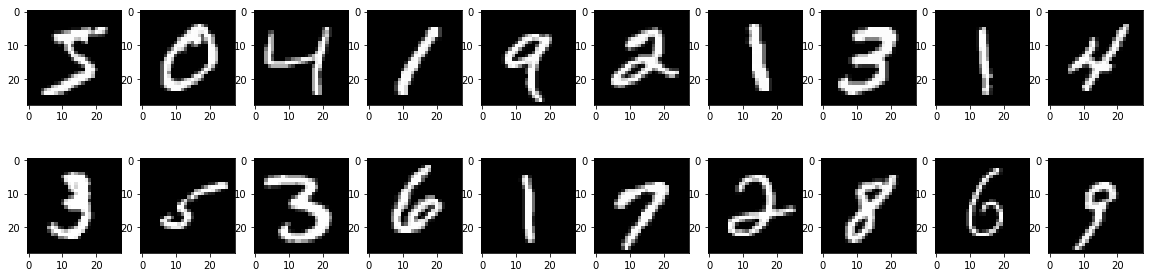

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

fig, ax = plt.subplots(nrows=2,ncols=10,figsize=(20,5))
ax = ax.ravel()

for i in range(20):
    ax[i].imshow(x_train[i],cmap = plt.get_cmap('gray'))

# A. Simple Neuron
Let's begin wih a simple neuron using a softmax activation function. Remember it's a vanilla approach ;)

In [4]:
# download of data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# obtaining a vector of 784 for the 28x28 images
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# normalizing between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('Number of categories:',y_train.shape[1])

Number of categories: 10


#### Defining model

In [5]:
def neuron_vanilla():
    model = Sequential()
    
    model.add(Dense(10,activation='softmax',input_dim=num_pixels))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = neuron_vanilla()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850.0
Trainable params: 7,850
Non-trainable params: 0.0
_________________________________________________________________


#### Fitting

In [6]:
model.fit(x_train,y_train, validation_data =(x_test,y_test),epochs=10,batch_size=64, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.5477 - acc: 0.8624 - val_loss: 0.3323 - val_acc: 0.9116
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.3242 - acc: 0.9105 - val_loss: 0.2938 - val_acc: 0.9195
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.2959 - acc: 0.9174 - val_loss: 0.2807 - val_acc: 0.9226
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.2823 - acc: 0.9210 - val_loss: 0.2728 - val_acc: 0.9239
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.2738 - acc: 0.9231 - val_loss: 0.2721 - val_acc: 0.9251
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.2682 - acc: 0.9246 - val_loss: 0.2668 - val_acc: 0.9261
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.2635 - acc: 0.9270 - val_loss: 0.2674 - val_acc: 0.9255
Epoch 8/10
60000/60000 [==============================] - 2s 

#### Evaluate

In [7]:
scores = model.evaluate(x_test,y_test,verbose=0)
print('loss: ', scores[0],'- accuracy: ', scores[1])

loss:  0.264919473314 - accuracy:  0.928


# B. MLP - first approach 
Let's opt for a simple MLP, with 2 hidden layers and 256 hidden units per layer.

In [8]:
def MLP():
    model = Sequential()
    
    model.add(Dense(256,activation='relu',input_dim=num_pixels))
    model.add(Dense(256,activation='relu'))
    
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = MLP()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 269,322.0
Trainable params: 269,322
Non-trainable params: 0.0
_________________________________________________________________


#### Fitting

In [9]:
model.fit(x_train,y_train, validation_data =(x_test,y_test),epochs=10,batch_size=64, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.2230 - acc: 0.9352 - val_loss: 0.1010 - val_acc: 0.9693
Epoch 2/10
60000/60000 [==============================] - 4s - loss: 0.0845 - acc: 0.9746 - val_loss: 0.0755 - val_acc: 0.9749
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.0560 - acc: 0.9825 - val_loss: 0.0713 - val_acc: 0.9781
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.0409 - acc: 0.9870 - val_loss: 0.0880 - val_acc: 0.9737
Epoch 5/10
60000/60000 [==============================] - 4s - loss: 0.0324 - acc: 0.9897 - val_loss: 0.0716 - val_acc: 0.9784
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.0234 - acc: 0.9920 - val_loss: 0.0764 - val_acc: 0.9801
Epoch 7/10
60000/60000 [==============================] - 4s - loss: 0.0242 - acc: 0.9918 - val_loss: 0.0793 - val_acc: 0.9795
Epoch 8/10
60000/60000 [==============================] - 4s 

#### Evaluating

In [10]:
scores = model.evaluate(x_test,y_test,verbose=0)
print('loss: ', scores[0],'- accuracy: ', scores[1])

loss:  0.0887658949246 - accuracy:  0.978


# C. MLP - Dropout and Batch-Norm
Let's opt for a Dropout and BatchNormalization for reducing overfitting.

In [11]:
def MLP_b():
    model = Sequential()

    model.add(Dense(256,activation='relu', input_dim=num_pixels))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
              
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = MLP_b()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total para

#### Fitting

In [12]:
model.fit(x_train,y_train, validation_data =(x_test,y_test),epochs=15,batch_size=64, verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s - loss: 0.2725 - acc: 0.9172 - val_loss: 0.1199 - val_acc: 0.9637
Epoch 2/15
60000/60000 [==============================] - 7s - loss: 0.1390 - acc: 0.9565 - val_loss: 0.0964 - val_acc: 0.9693
Epoch 3/15
60000/60000 [==============================] - 7s - loss: 0.1115 - acc: 0.9651 - val_loss: 0.0820 - val_acc: 0.9744
Epoch 4/15
60000/60000 [==============================] - 7s - loss: 0.0970 - acc: 0.9690 - val_loss: 0.0737 - val_acc: 0.9772
Epoch 5/15
60000/60000 [==============================] - 7s - loss: 0.0826 - acc: 0.9738 - val_loss: 0.0690 - val_acc: 0.9769
Epoch 6/15
60000/60000 [==============================] - 7s - loss: 0.0778 - acc: 0.9751 - val_loss: 0.0637 - val_acc: 0.9787
Epoch 7/15
60000/60000 [==============================] - 7s - loss: 0.0682 - acc: 0.9780 - val_loss: 0.0608 - val_acc: 0.9804
Epoch 8/15
60000/60000 [==============================] - 7s 

#### Evaluating

In [13]:
scores = model.evaluate(x_test,y_test,verbose=0)
print('loss: ', scores[0],'- accuracy: ', scores[1])

loss:  0.0606030175272 - accuracy:  0.9825


# D. Complexified CNN 
With Data-Augmentation - Batch-Normalization + Dropout + Conv2D + MaxPooling2D

#### Reshaping data
Here we take the images as a matrix of shape (height, width, depth)

In [3]:
# Downloading data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# reshaping the images for the conv2D (channels last)
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

# one hot encode for the categories
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### Data augmentation

In [17]:
batch_size = 64
train_samples = x_train.shape[0]
validation_samples = x_test.shape[0]

data_gen_train = ImageDataGenerator(rescale=1./255,
                              rotation_range=8,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.3,
                              zoom_range=0.1,
                              horizontal_flip=False)

data_gen_test = ImageDataGenerator(rescale=1./255)

train_generator = data_gen_train.flow(x_train, y_train, batch_size = batch_size)
validation_generator = data_gen_test.flow(x_test, y_test, batch_size = batch_size, shuffle=False)

### Defining model

In [5]:
def complex_conv_model():
    
    # creating the convnet model
    model = Sequential()
    
    # first convo block
    model.add(Conv2D(32,(5,5), activation='relu', input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    # two convo block
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
        
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
              
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = complex_conv_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 64)          256       
__________

### Fitting model

In [6]:
model.fit_generator(train_generator,
        steps_per_epoch = train_samples // batch_size,
        epochs=10,
        validation_data = validation_generator,
        validation_steps = validation_samples // batch_size)

Epoch 1/10
937/937 [==============================] - 27s - loss: 0.5260 - acc: 0.8388 - val_loss: 0.0566 - val_acc: 0.9829
Epoch 2/10
937/937 [==============================] - 23s - loss: 0.1678 - acc: 0.9513 - val_loss: 0.0321 - val_acc: 0.9906
Epoch 3/10
937/937 [==============================] - 23s - loss: 0.1298 - acc: 0.9626 - val_loss: 0.0247 - val_acc: 0.9915
Epoch 4/10
937/937 [==============================] - 23s - loss: 0.1019 - acc: 0.9711 - val_loss: 0.0208 - val_acc: 0.9935
Epoch 5/10
937/937 [==============================] - 23s - loss: 0.0964 - acc: 0.9728 - val_loss: 0.0260 - val_acc: 0.9919
Epoch 6/10
937/937 [==============================] - 23s - loss: 0.0840 - acc: 0.9767 - val_loss: 0.0241 - val_acc: 0.9919
Epoch 7/10
937/937 [==============================] - 22s - loss: 0.0775 - acc: 0.9774 - val_loss: 0.0195 - val_acc: 0.9940
Epoch 8/10
937/937 [==============================] - 23s - loss: 0.0733 - acc: 0.9790 - val_loss: 0.0373 - val_acc: 0.9907
Epoch 9/

### Visual check on small sample

In [18]:
predictions = model.predict_generator(validation_generator,steps=validation_generator.n/batch_size) 
predictions = [np.argmax(i) for i in np.round(predictions)]
y_tst = [np.argmax(i) for i in y_test]

In [19]:
pd.DataFrame({'true digits':y_tst[:50],
              'predicted digitis':predictions[:50]})

,predicted digitis,true digits
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9
